In [1]:
!pip install tensorflow pandas matplotlib scikit-learn


In [2]:
!git clone https://github.com/musthafa145/LSTM-Stock-Prediction-.git
%cd LSTM-Stock-Prediction-/LTSM\ Model


Cloning into 'LSTM-Stock-Prediction-'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 26.90 KiB | 26.90 MiB/s, done.
/content/LSTM-Stock-Prediction-/LTSM Model


In [3]:
!python main.py


2025-09-17 12:16:21.066726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758111381.092948    2003 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758111381.098438    2003 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758111381.112873    2003 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758111381.112906    2003 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758111381.112911    2003 computation_placer.cc:177] computation placer alr

In [6]:
data = pd.read_csv("/content/LSTM-Stock-Prediction-/LTSM Model/MicrosoftStock.csv")


In [7]:
# Imports
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Suppress TensorFlow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Load CSV
data = pd.read_csv("/content/LSTM-Stock-Prediction-/LTSM Model/MicrosoftStock.csv")

# Quick check
print(data.head())
print(data.info())
print(data.describe())


    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB
None
               index         open         high          low 

In [8]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Only keep the 'close' prices for prediction
stock_close = data.filter(["close"])
dataset = stock_close.values  # convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))  # 95% for training

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Create training sequences
training_data = scaled_data[:training_data_len]
X_train, y_train = [], []

for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # LSTM expects 3D input

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1137, 60, 1)
y_train shape: (1137,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))  # final output

model.compile(optimizer='adam', loss='mae', metrics=['RootMeanSquaredError'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - RootMeanSquaredError: 0.4823 - loss: 0.3619
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - RootMeanSquaredError: 0.1874 - loss: 0.1404
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - RootMeanSquaredError: 0.1665 - loss: 0.1212
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - RootMeanSquaredError: 0.1533 - loss: 0.1120
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - RootMeanSquaredError: 0.1589 - loss: 0.1152
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - RootMeanSquaredError: 0.1525 - loss: 0.1121
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - RootMeanSquaredError: 0.1478 - loss: 0.1094
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - RootMeanSquaredError: 0.1483 - loss: 0.1102
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - RootMeanSquaredError: 0.1485 - loss: 0.1085
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - RootMeanSquaredError: 0.1392 - loss: 0.1013
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━

In [10]:
# Extract test data (remaining 5% of the dataset)
test_data = scaled_data[training_data_len - 60:]  # last 60 of training + test

X_test, y_test = [], dataset[training_data_len:]  # y_test is actual prices
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [11]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # convert back to original scale


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step


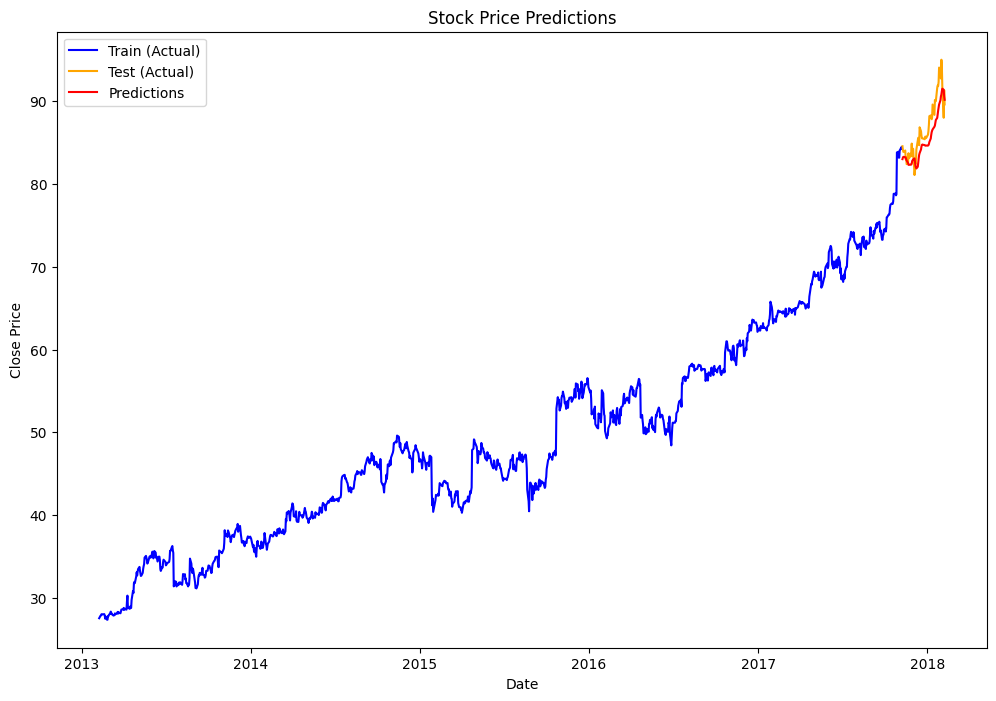

In [12]:
train = data[:training_data_len]
test = data[training_data_len:].copy()
test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Stock Price Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [15]:
import os

# Create the folder if it doesn't exist
os.makedirs("/content/LSTM-Stock-Prediction", exist_ok=True)

# Now save the model
model.save("/content/LSTM-Stock-Prediction/LSTM_model.keras")
